In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
data = pd.read_csv('train_knn.txt', sep=",",header=None)
data=data.to_numpy()

In [17]:
test_data = pd.read_csv('test_knn.txt', sep=",",header=None)
test_data=test_data.to_numpy()

In [4]:
data

array([[7, 7, 1],
       [7, 4, 1],
       [6, 4, 1],
       [7, 5, 1],
       [7, 6, 1],
       [6, 7, 1],
       [6, 6, 1],
       [3, 4, 2],
       [2, 3, 2],
       [3, 2, 2],
       [4, 3, 2],
       [3, 3, 2],
       [4, 4, 2],
       [1, 4, 2]], dtype=int64)

In [18]:
test_data

array([[3, 7],
       [7, 7],
       [4, 3],
       [2, 8],
       [3, 5],
       [1, 2],
       [4, 8],
       [8, 3],
       [8, 4]], dtype=int64)

In [9]:
data[0][2]

1

In [11]:
data[1][0:2]

array([7, 4], dtype=int64)

In [12]:
test1=[]
test2=[]

for i in range(len(data)):
    
    if data[i][2]==1:
        test1.append(data[i][0:2])
    else:
        test2.append(data[i][0:2])
test1=np.array(test1)
test2=np.array(test2)

In [13]:
test1

array([[7, 7],
       [7, 4],
       [6, 4],
       [7, 5],
       [7, 6],
       [6, 7],
       [6, 6]], dtype=int64)

In [14]:
test2

array([[3, 4],
       [2, 3],
       [3, 2],
       [4, 3],
       [3, 3],
       [4, 4],
       [1, 4]], dtype=int64)

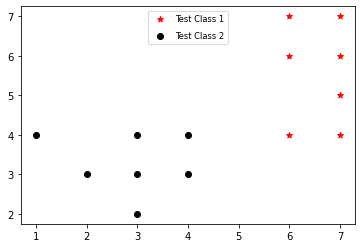

<Figure size 1080x576 with 0 Axes>

In [15]:
fig, ax = plt.subplots()
plt.figure(figsize=(15,8))

ax.scatter(test1[:,0], test1[:,1],marker='*',color='r',label='Test Class 1')
ax.scatter(test2[:,0], test2[:,1],marker='o',color='k',label='Test Class 2')
legend = ax.legend(loc='upper center', shadow=False, fontsize='small',labelspacing=1)
legend.get_frame().set_facecolor('None')
plt.show()

In [31]:
distances = []
prediction= []
final_dis = []

k = int(input())


for i in test_data:
    
    count1 = 0
    count2 = 0
    for j in data:
        dis = math.sqrt(((i[0] - j[0]) **2) + ((i[1] - j[1]) **2))
        
        distances.append([dis,j[2]])
    distances.sort(key = lambda x: x[0])
    for u in distances[:k]:
        if(u[1] == 1):
            count1 = count1 + 1
        else:
            count2 = count2 + 1
    if(count1 > count2):
        predicted = 1
    else:
        predicted = 2
    
    distances.insert(k,[i[0],i[1]])
#     print(distances[:k])
    final_dis.append(distances[:k+1])
    
    prediction.append([i[0],i[1],predicted])
    distances = []


3


In [32]:
prediction

[[3, 7, 1],
 [7, 7, 1],
 [4, 3, 2],
 [2, 8, 2],
 [3, 5, 2],
 [1, 2, 2],
 [4, 8, 1],
 [8, 3, 1],
 [8, 4, 1]]

In [35]:
prediction[1][2]

1

In [40]:
for i in range(len(prediction)):
    
    print(prediction[i][2])

1
1
2
2
2
2
1
1
1


In [42]:
test1=[]
test2=[]

for i in range(len(prediction)):
    
    if prediction[i][2]==1:
        test1.append(prediction[i][0:2])
    else:
        test2.append(prediction[i][0:2])


In [47]:
test1=np.array(test1)
test2=np.array(test2)

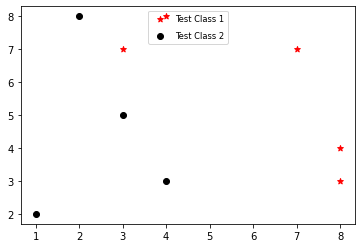

<Figure size 1080x576 with 0 Axes>

In [48]:
fig, ax = plt.subplots()
plt.figure(figsize=(15,8))

ax.scatter(test1[:,0], test1[:,1],marker='*',color='r',label='Test Class 1')
ax.scatter(test2[:,0], test2[:,1],marker='o',color='k',label='Test Class 2')
legend = ax.legend(loc='upper center', shadow=False, fontsize='small',labelspacing=1)
legend.get_frame().set_facecolor('None')
plt.show()

In [27]:
prediction = open('prediction.txt','w')
for j in (final_dis):
    predicted = ''
    count1 = 0
    count2 = 0
    print(j[len(j)-1])
    stest = str(j[len(j)-1])+'\n'
    prediction.write(stest)
    n =1
    for u in j[:-1]:
        print('Distance ',n,':',round(u[0]),'\tClass',u[1])
        sdis = 'Distance '+ str(n)+ ':'+ str( u[0] ) +'\tClass'+str(u[1])+'\n'
        prediction.write(sdis)
        if(u[1] == 1):
            count1 = count1 + 1
        else:
            count2 = count2 + 1
        n+=1
    if(count1 > count2):
        predicted = 'Class 1'
    else:
        predicted = 'Class 2'
    print('Predicted Class: ',predicted,'\n')
    spredict = 'Predicted Class: '+str(predicted)+'\n'
    prediction.write(spredict)
prediction.close()

[3, 7]
Distance  1 : 3 	Class 1
Distance  2 : 3 	Class 2
Distance  3 : 3 	Class 1
Predicted Class:  Class 1 

[7, 7]
Distance  1 : 0 	Class 1
Distance  2 : 1 	Class 1
Distance  3 : 1 	Class 1
Predicted Class:  Class 1 

[4, 3]
Distance  1 : 0 	Class 2
Distance  2 : 1 	Class 2
Distance  3 : 1 	Class 2
Predicted Class:  Class 2 

[2, 8]
Distance  1 : 4 	Class 1
Distance  2 : 4 	Class 2
Distance  3 : 4 	Class 2
Predicted Class:  Class 2 

[3, 5]
Distance  1 : 1 	Class 2
Distance  2 : 1 	Class 2
Distance  3 : 2 	Class 2
Predicted Class:  Class 2 

[1, 2]
Distance  1 : 1 	Class 2
Distance  2 : 2 	Class 2
Distance  3 : 2 	Class 2
Predicted Class:  Class 2 

[4, 8]
Distance  1 : 2 	Class 1
Distance  2 : 3 	Class 1
Distance  3 : 3 	Class 1
Predicted Class:  Class 1 

[8, 3]
Distance  1 : 1 	Class 1
Distance  2 : 2 	Class 1
Distance  3 : 2 	Class 1
Predicted Class:  Class 1 

[8, 4]
Distance  1 : 1 	Class 1
Distance  2 : 1 	Class 1
Distance  3 : 2 	Class 1
Predicted Class:  Class 1 

